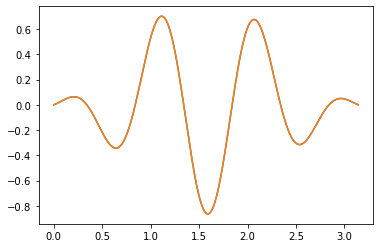

1E+00 4E-01 1E+00 1E+00 2E-01 1E+00 7E-02 7E-02 1E+00 6E-02 1E+00 1E-02 5E-03 8E-03 5E-03 1E-03 6E-04 4E-04 
Initial params: goal = 1E+00 
 [[[1. 1. 1.]]

 [[1. 1. 1.]]]
Final params: goal = 4E-04 
 [[[ 1.62950601 -0.03203382  1.06188255]]

 [[ 0.98624013  0.90034756  1.01009835]]]


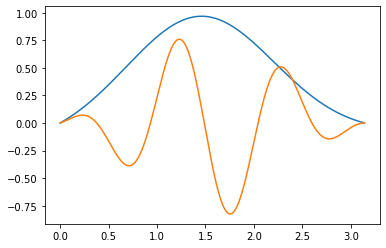

UnboundLocalError: local variable 'grad' referenced before assignment

In [1]:

import autograd.numpy as np
import scipy
from qutip import qeye, sigmax, sigmay, tensor, fock
from tested.getCtrl import getCtrl, pltCtrl
from tested.getFid import getFid
from tested.minimize import minimize, test

#test()

a0 = np.ones([2, 1, 3])
T = np.pi
pltCtrl(a0, T)
U0 = np.array(qeye(2).full())
sx = np.array(sigmax().full())
sy = np.array(sigmay().full())
Ugoal = sx
Hcs = [sx, sy]
def Hat(a,t):
    c = getCtrl(a, t, T) + 1e-3
    return sum([ c[i]*Hcs[i] for i in range(len(Hcs)) ])
def goalFunc(U):
    return 1 - getFid(U, Ugoal)
def callback(a):
    pltCtrl(a, T)
minimize(a0, U0, Hat, T, goalFunc, callback)
